<a href="https://colab.research.google.com/github/PuruBhatnagar1197/Machine-Learning-Revision/blob/main/Unsupervised_Anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TO use DBSCAN FOR Anomaly detection**   (its  a lot complutationla heavy change the algorith)

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"/content/KDDTrain+.csv",header=None)

In [3]:
col=[]
for i in range (1, len(df.columns.to_list())+1):
    col.append('col_'+str(i))


In [47]:
col

['col_1',
 'col_2',
 'col_3',
 'col_4',
 'col_5',
 'col_6',
 'col_7',
 'col_8',
 'col_9',
 'col_10',
 'col_11',
 'col_12',
 'col_13',
 'col_14',
 'col_15',
 'col_16',
 'col_17',
 'col_18',
 'col_19',
 'col_20',
 'col_21',
 'col_22',
 'col_23',
 'col_24',
 'col_25',
 'col_26',
 'col_27',
 'col_28',
 'col_29',
 'col_30',
 'col_31',
 'col_32',
 'col_33',
 'col_34',
 'col_35',
 'col_36',
 'col_37',
 'col_38',
 'col_39',
 'col_40',
 'col_41',
 'col_42',
 'col_43']

In [4]:
df.columns=col ### to give col name

In [5]:
df.shape

(125973, 43)

In [6]:
df.select_dtypes(include='object')['col_2'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [7]:
df.select_dtypes(include='object')['col_3'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [8]:
df.select_dtypes(include='object')['col_4'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [9]:
df.select_dtypes(include='object')['col_43'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [10]:
df.describe()

col_1         col_5         col_6          col_7          col_8  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198       0.022687   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086       0.253530   
min         0.00000  0.000000e+00  0.000000e+00       0.000000       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000       3.000000   

               col_9         col_10         col_11         col_12  \
count  125973.000000  125973.000000  125973.000000  125973.000000   
mean        0.000111       0.204409       0.001222       0.395736   
std         0.014366       2.149968       0.045239       0.489010   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       1.000000   
max         3.000000      77.000000       5.000000       1.000000   

              col_13         col_14         col_15         col_16  \
count  125973.000000  125973.000000  125973.000000  125973.000000   
mean        0.279250       0.001342       0.001103       0.302192   
std        23.942042       0.036603       0.045154      24.399618   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      7479.000000       1.000000       2.000000    7468.000000   

              col_17         col_18         col_19    col_20         col_21  \
count  125973.000000  125973.000000  125973.000000  125973.0  125973.000000   
mean        0.012669       0.000413       0.004096       0.0       0.000008   
std         0.483935       0.022181       0.099370       0.0       0.002817   
min         0.000000       0.000000       0.000000       0.0       0.000000   
25%         0.000000       0.000000       0.000000       0.0       0.000000   
50%         0.000000       0.000000       0.000000       0.0       0.000000   
75%         0.000000       0.000000       0.000000       0.0       0.000000   
max        43.000000       2.000000       9.000000       0.0       1.000000   

              col_22         col_23         col_24         col_25  \
count  125973.000000  125973.000000  125973.000000  125973.000000   
mean        0.009423      84.107555      27.737888       0.284485   
std         0.096612     114.508607      72.635840       0.446456   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       2.000000       2.000000       0.000000   
50%         0.000000      14.000000       8.000000       0.000000   
75%         0.000000     143.000000      18.000000       1.000000   
max         1.000000     511.000000     511.000000       1.000000   

              col_26         col_27         col_28         col_29  \
count  125973.000000  125973.000000  125973.000000  125973.000000   
mean        0.282485       0.119958       0.121183       0.660928   
std         0.447022       0.320436       0.323647       0.439623   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.090000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         1.000000       0.000000       0.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

              col_30         col_31         col_32         col_33  \
count  125973.0

In [11]:
df.isna().sum() ### no null

col_1     0
col_2     0
col_3     0
col_4     0
col_5     0
col_6     0
col_7     0
col_8     0
col_9     0
col_10    0
col_11    0
col_12    0
col_13    0
col_14    0
col_15    0
col_16    0
col_17    0
col_18    0
col_19    0
col_20    0
col_21    0
col_22    0
col_23    0
col_24    0
col_25    0
col_26    0
col_27    0
col_28    0
col_29    0
col_30    0
col_31    0
col_32    0
col_33    0
col_34    0
col_35    0
col_36    0
col_37    0
col_38    0
col_39    0
col_40    0
col_41    0
col_42    0
col_43    0
dtype: int64

In [12]:
df[['col_2','col_4','col_3','col_43']].sort_values(by='col_2')

col_2 col_4     col_3   col_43
93573   icmp    SF     eco_i  ipsweep
47809   icmp    SF     eco_i  ipsweep
15406   icmp    SF     eco_i  ipsweep
15407   icmp    SF     ecr_i    smurf
15408   icmp    SF     ecr_i    smurf
...      ...   ...       ...      ...
75934    udp    SF   private   normal
114998   udp    SF  domain_u   normal
115000   udp    SF  domain_u   normal
69599    udp    SF     other   normal
102931   udp    SF  domain_u   normal

[125973 rows x 4 columns]

In [13]:
df[['col_3','col_2','col_4','col_43']].nunique()

col_3     70
col_2      3
col_4     11
col_43    23
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
lb=LabelEncoder()

In [16]:
df2=df.copy(deep=True)
# df2['col_2_label']=lb.fit_transform(df['col_2'])
# df2['col_3_label']=lb.fit_transform(df['col_3'])
# df2['col_4_label']=lb.fit_transform(df['col_4'])
# df2['col_43_label']=lb.fit_transform(df['col_43'])

In [17]:
df2['col_2_label']=lb.fit_transform(df['col_2'])

In [18]:
label={}
for i in df2.select_dtypes(include='object'):
    if i!='col_43':
        df2[i+str("_label")]=lb.fit_transform(df[i])
        label[i]=lb.classes_

In [19]:
df2.drop(columns=['col_2'], axis=1,inplace=True)
df2.drop(columns=['col_3'], axis=1,inplace=True)
df2.drop(columns=['col_4'], axis=1,inplace=True)
df2.drop(columns=['col_43'], axis=1,inplace=True)

In [20]:
df2

col_1  col_5  col_6  col_7  col_8  col_9  col_10  col_11  col_12  \
0           0    491      0      0      0      0       0       0       0   
1           0    146      0      0      0      0       0       0       0   
2           0      0      0      0      0      0       0       0       0   
3           0    232   8153      0      0      0       0       0       1   
4           0    199    420      0      0      0       0       0       1   
...       ...    ...    ...    ...    ...    ...     ...     ...     ...   
125968      0      0      0      0      0      0       0       0       0   
125969      8    105    145      0      0      0       0       0       0   
125970      0   2231    384      0      0      0       0       0       1   
125971      0      0      0      0      0      0       0       0       0   
125972      0    151      0      0      0      0       0       0       1   

        col_13  col_14  col_15  col_16  col_17  col_18  col_19  col_20  \
0            0       0       0       0       0       0       0       0   
1            0       0       0       0       0       0       0       0   
2            0       0       0       0       0       0       0       0   
3            0       0       0       0       0       0       0       0   
4            0       0       0       0       0       0       0       0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
125968       0       0       0       0       0       0       0       0   
125969       0       0       0       0       0       0       0       0   
125970       0       0       0       0       0       0       0       0   
125971       0       0       0       0       0       0       0       0   
125972       0       0       0       0       0       0       0       0   

        col_21  col_22  col_23  col_24  col_25  col_26  col_27  col_28  \
0            0       0       2       2     0.0     0.0     0.0     0.0   
1            0       0      13       1     0.0     0.0     0.0     0.0   
2            0       0     123       6     1.0     1.0     0.0     0.0   
3            0       0       5       5     0.2     0.2     0.0     0.0   
4            0       0      30      32     0.0     0.0     0.0     0.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
125968       0       0     184      25     1.0     1.0     0.0     0.0   
125969       0       0       2       2     0.0     0.0     0.0     0.0   
125970       0       0       1       1     0.0     0.0     0.0     0.0   
125971       0       0     144       8     1.0     1.0     0.0     0.0   
125972       0       0       1       1     0.0     0.0     0.0     0.0   

        col_29  col_30  col_31  col_32  col_33  col_34  col_35  col_36  \
0         1.00    0.00    0.00     150      25    0.17    0.03    0.17   
1         0.08    0.15    0.00     255       1    0.00    0.60    0.88   
2         0.05    0.07    0.00     255      26    0.10    0.05    0.00   
3         1.00    0.00    0.00      30     255    1.00    0.00    0.03   
4         1.00    0.00    0.09     255     255    1.00    0.00    0.00   
...        ...     ...     ...     ...     ...     ...     ...     ...   
125968    0.14    0.06    0.00     255      25    0.10    0.06    0.00   
125969    1.00    0.00    0.00     255     244    0.96    0.01    0.01   
125970    1.00    0.00    0.00     255      30    0.12    0.06    0.00   
125971    0.06    0.05    0.00     255       8    0.03    0.05    0.00   
125972    1.00    0.00    0.00     255      77    0.30    0.03    0.30   

        col_37  col_38  col_39  col_40  col_41  col_42  col_2_label  \
0         0.00    0.00    0.00    0.05    0.00      20            1   
1         0.00    0.00    0.00    0.00    0.00      15            2   
2         0.00    1.00    1.00    0.00    0.00      19            1   
3         0.04    0.03    0.01    0.00    0.01      21            1   
4         0.00    0.00    0.00    0.00    0.00      21            1   
..

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc=StandardScaler()

In [23]:
df_scaled=sc.fit_transform(df2)

In [24]:
from sklearn.neighbors import NearestNeighbors

In [25]:
df_scaled_sample=df_scaled[:10000]

In [26]:
df_scaled_sample.shape

(10000, 42)

In [27]:
nnb=NearestNeighbors(n_neighbors=5)

In [28]:
nnb_d=nnb.fit(df_scaled_sample)

In [29]:
nnb_d

NearestNeighbors()

In [30]:
distance, indices=nnb_d.kneighbors(df_scaled_sample)

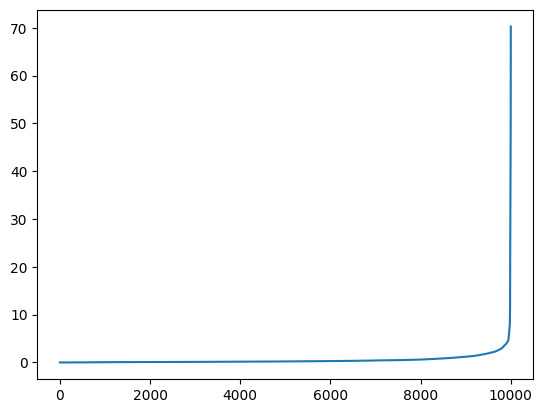

In [31]:
plt.plot(sorted(distance[:,4]))

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca_compon=PCA(n_components=0.95,svd_solver='full')

In [34]:
pca=pca_compon.fit_transform(df_scaled)

In [48]:
pca_df=pd.DataFrame(pca,columns=['col_1',
 'col_2',
 'col_3',
 'col_4',
 'col_5',
 'col_6',
 'col_7',
 'col_8',
 'col_9',
 'col_10',
 'col_11',
 'col_12',
 'col_13',
 'col_14',
 'col_15',
 'col_16',
 'col_17',
 'col_18',
 'col_19',
 'col_20',
 'col_21',
 'col_22',
 'col_23',
 'col_24',
 'col_25'])

In [44]:
# plt.scatter(pca_df['c1'], pca_df['c2'], edgecolor='k', s=50)

In [50]:
import plotly.express as px

fig = px.scatter_3d(pca_df,x=pca_df['col_1'], y=pca_df['col_2'], z=pca_df['col_3'])
fig.show()

In [51]:
### best the data can be clustered through either KNN or DBSCAN etc ;;;; the below piece of code will not runn as this will show memory issue lets divide the whole data into batches and then do these steps

In [66]:
from sklearn.cluster import DBSCAN

In [53]:
# dbscn=DBSCAN(eps=7, min_samples=10, algorithm='auto',n_jobs=-1)

In [54]:
# dbscn.fit(pca)

In [55]:
# df_scaled.shape

In [71]:
def make_bathces_dbscan(pca,eps,min_sample,batch_size):
    n_samples=pca.shape[0]
    labels=np.full(pca.shape[0],-1)
    start=0
    batch_num=0

    while start<n_samples:
        print(start)
        end=min(start+batch_size,n_samples)
        suset_pca=pca[start:end]
        db=DBSCAN(eps=eps, min_samples=min_sample, algorithm='auto',n_jobs=-1)
        batch_labels=db.fit_predict(suset_pca)
        if batch_num>0:
            batch_labels[batch_labels!=-1]+=np.max(labels)+1

        labels[start:end]=batch_labels
        start+=batch_size
        batch_num=1
    return labels





In [72]:
batch_size=10000
eps=7
min_sample=10
label=make_bathces_dbscan(pca,eps,min_sample,batch_size)


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000


In [62]:
np.max([0,1,3,4,5])+1

6

In [73]:
anomaly=pca[label==-1]

In [74]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [75]:
silhouette_score(pca,label)  ## though this is not generating good results but overall the process does look like this; other thing we can try is changing dimensionality more and using other algos

-0.014006208251009514